In [1]:
#load "Paket.fsx"
Paket.Package
  [ "NBitcoin.Mono -Version 3.0.0.47"]     
  
#load "Paket.Generated.Refs.fsx"

open System
open NBitcoin
open NBitcoin.Crypto   

RandomUtils.Random <- (new UnsecureRandom():>IRandom)

type Wallet =
     static member PrivateKey = 
            (new Key())
     static member PublicKey (k:Key) = 
            if (k=null) then
              (new Key()).PubKey
            else
              k.PubKey
     static member BitcoinSecretMain (k:Key) = 
            if (k=null) then
                Wallet.PrivateKey.GetBitcoinSecret(Network.Main)
            else
                k.GetBitcoinSecret(Network.Main)
     static member BitcoinSecretTest (k:Key) = 
            if (k=null) then
                Wallet.PrivateKey.GetBitcoinSecret(Network.TestNet)
            else
                k.GetBitcoinSecret(Network.TestNet)    
     static member WifMain (k:Key) = 
            if (k=null) then
                Wallet.PrivateKey.GetWif(Network.Main)
            else
                k.GetWif(Network.Main)
     static member WifTest (k:Key) = 
            if (k=null) then
                Wallet.PrivateKey.GetWif(Network.TestNet)
            else
                k.GetWif(Network.TestNet)

     static member BitCoinAddressMain (k:Key) = 
        Wallet.PublicKey(k).GetAddress(Network.Main) 
     static member BitCoinAddressTest  (k:Key) = 
        Wallet.PublicKey(k).GetAddress(Network.TestNet) 
     static member PublicKeyHash (k:Key) = 
        Wallet.PublicKey(k).Hash 
     static member BitCoinAddressMain2 (k:Key) = 
        Wallet.PublicKey(k).Hash.GetAddress(Network.Main) 
     static member BitCoinAddressTest2  (k:Key) = 
        Wallet.PublicKey(k).Hash.GetAddress(Network.TestNet) 




In [2]:
let timestamp = DateTimeOffset(DateTime.Now).ToUnixTimeSeconds() //val unix : int64 = 1488254491L

printfn "%A" timestamp

1524159418L


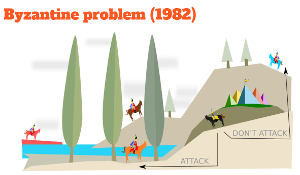

In [3]:
open System.Collections.Generic

type Message = { pk: BitcoinPubKeyAddress; msg: string; sign: string; timestamp:int64}

type Node = { pk: BitcoinPubKeyAddress; sk: Key; ledger:  List<Message> }

let SkGeneral = Wallet.PrivateKey
let PkGeneral =  Wallet.BitCoinAddressMain SkGeneral

printfn "%A" (Wallet.WifMain SkGeneral)
printfn "%A" "----------------"
//printfn "%A" PkGeneral
//let content ="Attack, tomorrow. For God sake!!!!"
let content =  "SF5128165575"

let message ={ pk = PkGeneral; sign = SkGeneral.SignMessage(content); msg =content; timestamp=timestamp }

printfn "%A" message

L1HAoSF8gvKaTXZ623WT4sx1hnSR28nwsq2PPFjLazJUd2xELsKH
"----------------"
{pk = 1xX3DRapVVSEaERZneRmBEDoEux68b2W1;
 msg = "SF5128165575";
 sign =
  "H35yq+iQB9Zp2FeaFwb9e1xw+28D8ueUIjvcq/S4G2rWJRJg6896I2DJVmN2us897+qwCdY8YzSzdaiXaopA9FE=";
 timestamp = 1524159418L;}


In [4]:
let SkA = Wallet.PrivateKey
let PkA = Wallet.BitCoinAddressMain SkA

let A = { pk= PkA; sk= SkA; ledger = new List<Message>()}

printfn "A %A" A


A {pk = 1GrxgB1N3zVnrWijLD7NdiLvuBHN1CuAVg;
 sk = NBitcoin.Key;
 ledger = seq [];}


In [5]:
let SkB = Wallet.PrivateKey
let PkB = Wallet.BitCoinAddressMain SkB

let B = { pk= PkB; sk= SkB; ledger = new List<Message>()}

printfn "B %A" B

let SkC = Wallet.PrivateKey
let PkC = Wallet.BitCoinAddressMain SkC

let C = { pk= PkC; sk= SkC; ledger = new List<Message>()}

printfn "C %A" C



B {pk = 1PpixDrqKY3BmaG4vRZgw8aY3S31ogKBKR;
 sk = NBitcoin.Key;
 ledger = seq [];}
C {pk = 17ocnpVhK6pifWP7QPqywsk1E4gi98VZGy;
 sk = NBitcoin.Key;
 ledger = seq [];}


In [7]:
A.ledger.Add(message)
B.ledger.Add(message)
C.ledger.Add(message)

printfn "%A" A

{pk = 1GrxgB1N3zVnrWijLD7NdiLvuBHN1CuAVg;
 sk = NBitcoin.Key;
 ledger =
  seq
    [{pk = 1xX3DRapVVSEaERZneRmBEDoEux68b2W1;
      msg = "SF5128165575";
      sign =
       "H35yq+iQB9Zp2FeaFwb9e1xw+28D8ueUIjvcq/S4G2rWJRJg6896I2DJVmN2us897+qwCdY8YzSzdaiXaopA9FE=";
      timestamp = 1524159418L;}];}


In [9]:
let index= 0
let verified = if PkGeneral = A.ledger.[index].pk then PkGeneral.VerifyMessage(A.ledger.[index].msg, A.ledger.[index].sign) else false

printfn "%A" verified

true


In [11]:
let fake = "000000100"
               

In [12]:
let verified' = PkGeneral.VerifyMessage(fake, A.ledger.[index].sign) 

printfn "%A" verified'

false
